In [64]:
from sp_utilities import combine_params2, inverse_transform2, get_params2D, set_params2D
from sp_alignment import ormq, ornq
from global_def import *
from EMAN2 import EMNumPy
import matplotlib.pyplot as plt
import h5py

In [113]:
import numpy as np 
def visualise_images(X, n_images, n_columns, randomise=False, cmap=plt.cm.Greys_r ):
    indices = np.arange(X.shape[0])
    if randomise:
        np.random.shuffle(indices)
    indices = indices[:n_images]
    n_rows = np.ceil(n_images / n_columns)
    fig = plt.figure(figsize=(2*n_columns, 2*n_rows))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the digits: each image is 8x8 pixels
    for i, e in enumerate(indices):
        ax = fig.add_subplot(n_rows, n_columns, i + 1, xticks=[], yticks=[])
        ax.imshow(X[e], cmap=cmap, interpolation='nearest')

In [132]:
#filename = 'faces.hdf'
#filename = 'rib_images.hdf'
filename = '../out2/aqm009.hdf'
size=50

In [133]:
f = h5py.File(filename, 'r')
hdf = f['MDF'][u'images']
imgs = np.array(f['MDF'][u'images']['0']['image'])
imgs = np.expand_dims(imgs, axis=0)
for i, img in enumerate(hdf.items()):
    if i >0 and i < size:
        img = np.expand_dims(np.array(img[1]['image']), axis=0)
        imgs = np.concatenate((imgs,img), axis=0)

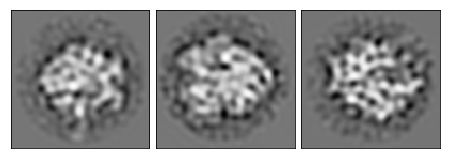

In [134]:
visualise_images(imgs, 20, 5)

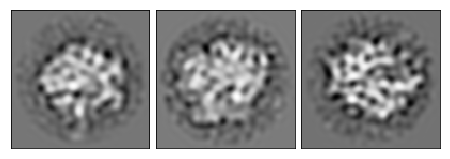

In [125]:
visualise_images(imgs, 20, 5)

In [85]:
import sparx as spx
refi = [spx.model_blank(130, 130) for i in range(3)]

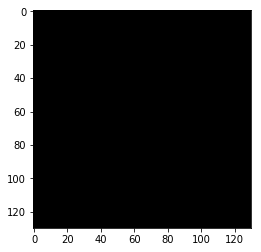

In [86]:
plt.imshow(EMNumPy.em2numpy(refi[0]), cmap='gray')

In [87]:
for j in range(3):  refi[j].write_image("blank.hdf", j)

In [92]:
from isac import *
refi = generate_random_averages(data, 3)

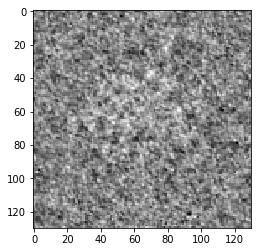

In [94]:
plt.imshow(EMNumPy.em2numpy(refi[0]), cmap='gray')

In [93]:
for j in range(3):  refi[j].write_image("random.hdf", j)

In [15]:
ali_params="xform.align2d"

In [90]:
data = EMData.read_images("../rib_images22.hdf")

In [51]:
refi

[[<libpyEMData2.EMData at 0x7fabc3f56d70>,

In [41]:
refi = []
for i in range(5):
    refi.append([data[i], data[5+i]])

In [50]:
[a[0] for a in refi]

In [7]:
ref = EMData.read_images("../rib_ref.hdf")

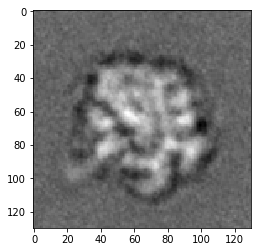

In [14]:
plt.imshow(EMNumPy.em2numpy(ref[0]), cmap='gray')

In [25]:
alpha, sx, sy, mirror, dummy = get_params2D(data[1], ali_params)
alpha, sx, sy, mirror, dummy

(141.42257753434927, 0.47458410263061523, 4.216013431549072, 0, 1.0)

In [26]:
alpha, sx, sy, dummy         = combine_params2(alpha, sx, sy, mirror, 0.0, -3, -1, 0)
alpha, sx, sy, dummy

(141.42257753434927, -2.5254158973693848, 3.2160134315490723, 0)

In [28]:
a, sxi, syi, _  = inverse_transform2(alpha, sx, sy)
a, sxi, syi

(218.5774203360948, 0.031129680573940277, 4.0889482498168945)